# Global params

In [11]:
img_directory = '/home/ec2-user/autoencoder-vaegan/colbert'
img_save_directory = '/home/ec2-user/autoencoder-vaegan/colbert-out'
model_weights_path = '/home/ec2-user/colbert-auto-plain-weights.hdf5'
batch_size = 64
training_set_size = 3264
img_size = 128

# Imports and helper functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import load_img, resize_crop
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

# Load training data

In [12]:
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


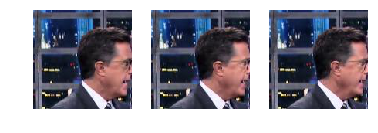

In [13]:
imshow([training[i] for i in range(100,103)])

# Create model and load weights

Instantiate model

In [5]:
from model import Vaegan
from keras.optimizers import Adam

model = Vaegan(img_shape=(img_size, img_size, 3), batch_size=batch_size)

Using TensorFlow backend.


Compile model

In [6]:
model.model.compile(Adam(lr=.00001), 'binary_crossentropy')
# model.model.compile(Adam(lr=.000001), 'binary_crossentropy')

Load weights

In [7]:
if (True):
    model.model.load_weights(model_weights_path)

# Zach and latest output of Zach

In [7]:
onlyfiles = [f for f in os.listdir(img_save_directory) if os.path.isfile(os.path.join(img_save_directory, f))]
if (len(onlyfiles) > 0):
    latest = max(onlyfiles)
    imshow([training[0], sp.ndimage.imread(os.path.join(img_save_directory, latest))])

# Train

Reset image save filename counter

In [15]:
save_idx = 0

Define some useful Keras callbacks

In [20]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.000000000001)    

In [ ]:
# save an image of prediction before training
# predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
# path = os.path.join(img_save_directory, '%04d.jpg' % save_idx)
# sp.misc.imsave(path, predictions[0])
# save_idx += 1

start = save_idx
stop = save_idx + 1000

for i in range(start, stop):
    model.model.fit(x=training, y=training, epochs=1, batch_size=batch_size, verbose=True, callbacks=[reduce_lr])
    predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
    path = os.path.join(img_save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, predictions[0])
    model.model.save_weights(model_weights_path)
    save_idx = i

Epoch 1/1
3264/3264 [==============================] - 23s - loss: 10.2225    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 10.0897    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 9.8180    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 9.4886    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 9.3875    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 9.2371    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 8.8765    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 8.6205    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 8.4580    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 8.3032    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 8.1625    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 7.8312    
Epoch 1/1
3264/3264 [==============================] - 23s - l

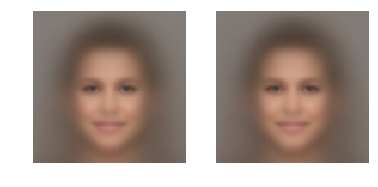

In [57]:
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
imshow([predictions[0], predictions[7]])